Digit shape: (1797, 64)


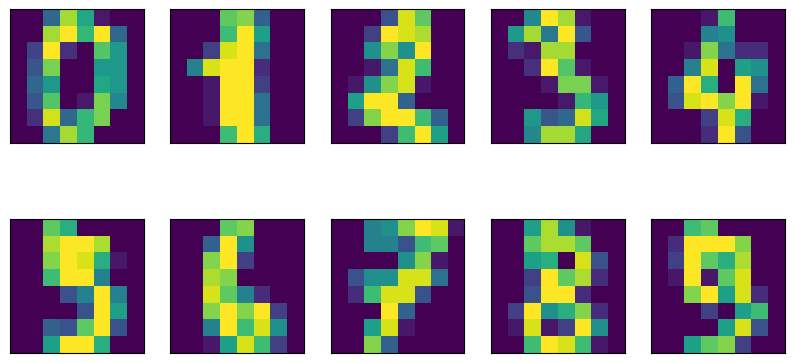

In [8]:
%matplotlib inline
# L'algo t-SNE ( t distributed Stochastic Neighbor Embedding ) appartient à la classe des algo d'apprentissage 
# de variétés
# t-SNE est utilisé pour l'exploration de données : il permet de trouver une nouvelle représentation des données
# d'apprentissage. Il ne permet pas de transformer les données de test, et est donc rarement employé lorsque le 
# le but est un apprentissage surpervisé.
# A partir d'une représentation aléatoire bidimensionnelle des données d'apprentissage, il essaye de rapprocher
# les points dans la représentation préservant les distances entre les points dans le domaine de définition
# initial des caractéristiques : plus deux caractéristiques initiales sont proches, plus leurs représentations
# finales seront proches, plus les deux caractéristiques finales sont éloignées, plus leurs représentations seront
# éloignées.


import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
print("Digit shape: {}".format(digits.data.shape))

fig, axes = plt.subplots(2,5,figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 't-SNE paramètre 1')

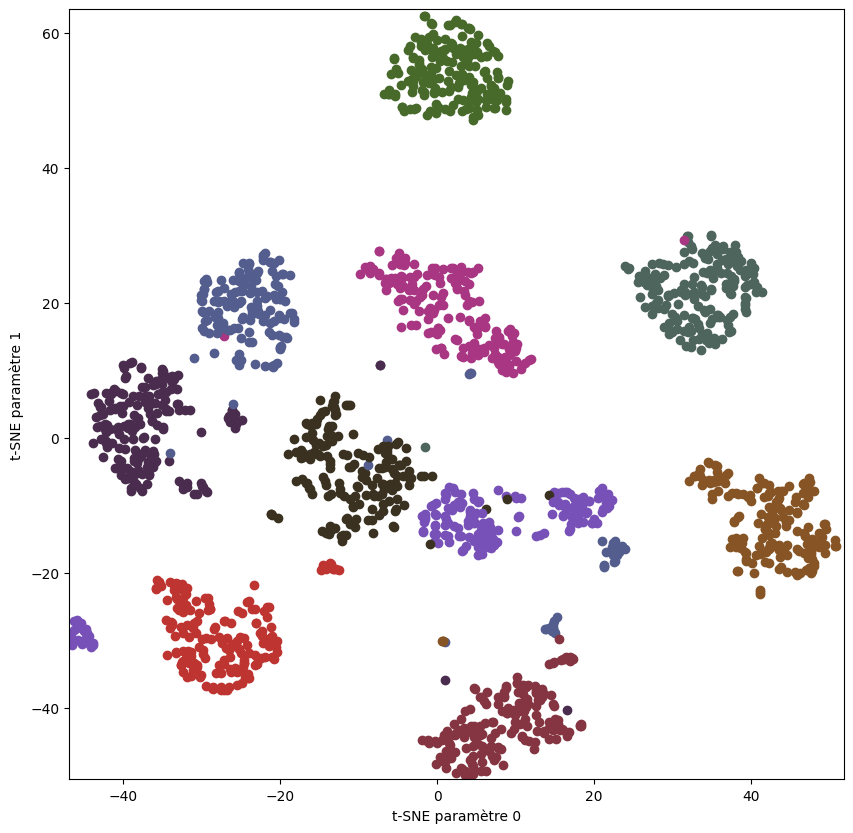

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
colors=["#476A2A","#7851B8","#BD3430","#4A2D4E","#875525","#A83683","#4E655E","#853541","#3A3120","#535D8E"]
markers=[]

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    #plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
    #        color=colors[digits.target[i]],
    #        fontdict={'weight': 'bold', 'size':9})
    plt.scatter(digits_tsne[i,0], digits_tsne[i,1],color=colors[digits.target[i]],marker='o')

plt.xlabel("t-SNE paramètre 0")
plt.ylabel("t-SNE paramètre 1")

# On voit assez nettement l'effet de l'existence de classes.

Text(0, 0.5, 'PCA paramètre 1')

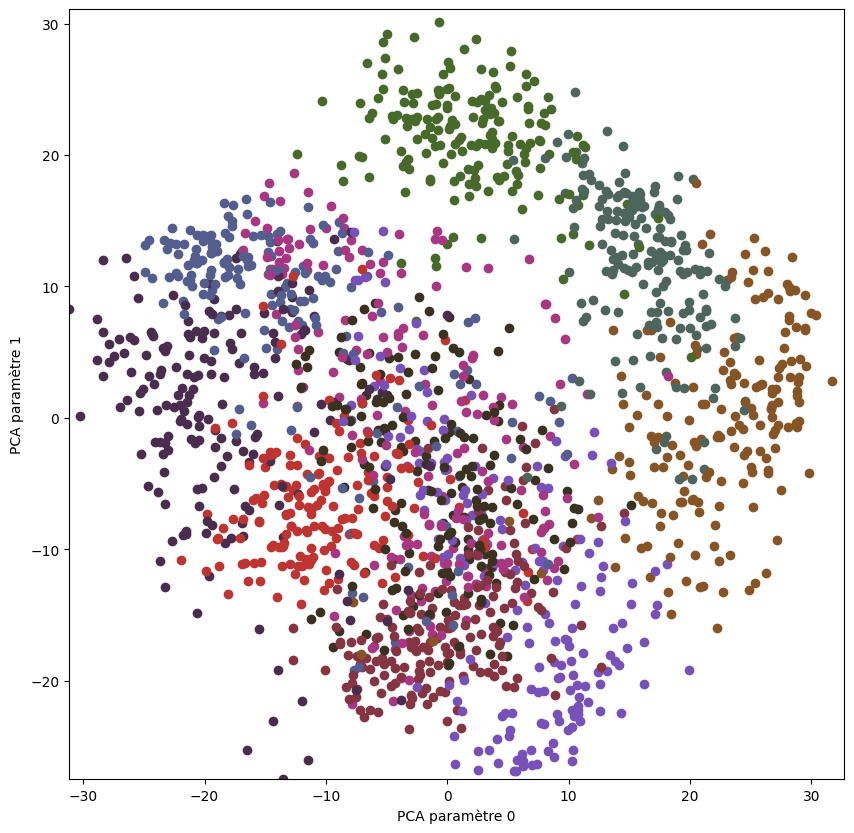

In [16]:
# Ce qui est à mettre en perspective d'une analyse en composante principale :
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max()+1)
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max()+1)
for i in range(len(digits.data)):
    plt.scatter(digits_pca[i,0], digits_pca[i,1],color=colors[digits.target[i]],marker='o')

plt.xlabel("PCA paramètre 0")
plt.ylabel("PCA paramètre 1")